In [31]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd

In [33]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [35]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables, means start mappig from engine
Base.prepare(engine, reflect=True)

In [37]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [39]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [41]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [42]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [61]:
import datetime as dt

# Exploratory Climate Analysis

In [ ]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
sel = [func.strftime("%m",, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.avg(Dow.close_price)]
may_averages = session.query(*sel).\
    filter(func.strftime("%m", Dow.date) == "05").\
    group_by(Dow.stock).\
    order_by(Dow.stock).all()
may_averages

In [44]:
# date 1 year ago from today
year_ago = dt.date.today() - dt.timedelta(days=730)
year_ago

datetime.date(2016, 8, 4)

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel=[func.strftime("%d",Measurement.date),
     func.sum(Measurement.prcp)]
mon_prcp=session.query(*sel).filter((Measurement.date>='2016-08-04')).filter((Measurement.date<'2017-08-04')).group_by(func.strftime("%d",Measurement.date)).all()
mon_prcp

[('01', 17.090000000000003),
 ('02', 11.359999999999996),
 ('03', 9.030000000000001),
 ('04', 9.250000000000002),
 ('05', 8.469999999999999),
 ('06', 3.62),
 ('07', 14.0),
 ('08', 7.0200000000000005),
 ('09', 10.759999999999998),
 ('10', 4.279999999999999),
 ('11', 16.769999999999996),
 ('12', 16.079999999999995),
 ('13', 11.54),
 ('14', 27.489999999999995),
 ('15', 12.68),
 ('16', 8.209999999999997),
 ('17', 8.690000000000001),
 ('18', 10.51),
 ('19', 5.74),
 ('20', 6.0),
 ('21', 17.01),
 ('22', 28.06),
 ('23', 10.429999999999998),
 ('24', 24.74),
 ('25', 12.610000000000001),
 ('26', 5.7299999999999995),
 ('27', 5.449999999999999),
 ('28', 12.049999999999995),
 ('29', 18.22),
 ('30', 16.39),
 ('31', 7.309999999999999)]

In [50]:
mon_prcp=session.query(*sel).group_by(Measurement.date).all()
mon_prcp

[('2010-01-01', 1.06),
 ('2010-01-02', 0.02),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.01),
 ('2010-01-05', 0.03),
 ('2010-01-06', 0.5800000000000001),
 ('2010-01-07', 1.65),
 ('2010-01-08', 0.06),
 ('2010-01-09', 0.02),
 ('2010-01-10', 0.02),
 ('2010-01-11', 0.8800000000000001),
 ('2010-01-12', 0.02),
 ('2010-01-13', 0.02),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.01),
 ('2010-01-21', 0.65),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.02),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.25),
 ('2010-01-27', 1.6),
 ('2010-01-28', 0.73),
 ('2010-01-29', 2.19),
 ('2010-01-30', 7.3500000000000005),
 ('2010-01-31', 2.16),
 ('2010-02-01', 0.05),
 ('2010-02-02', 0.05),
 ('2010-02-03', 3.21),
 ('2010-02-04', 0.02),
 ('2010-02-05', 0.16),
 ('2010-02-06', 0.12),
 ('2010-02-07', 0.01),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-10', 0.0),
 ('2010-02-11', 0.0),
 ('2010

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel=[Measurement.date,
     func.sum(Measurement.prcp)]
day_prcp=session.query(*sel).filter((Measurement.date>='2016-08-04')).filter((Measurement.date<'2017-08-04')).group_by(Measurement.date).all()


In [75]:
df_m=pd.DataFrame(day_prcp,columns=['date','Prcp'])
df_m['date'].head()

0    2016-08-04
1    2016-08-05
2    2016-08-06
3    2016-08-07
4    2016-08-08
Name: date, dtype: object

<IPython.core.display.Javascript object>


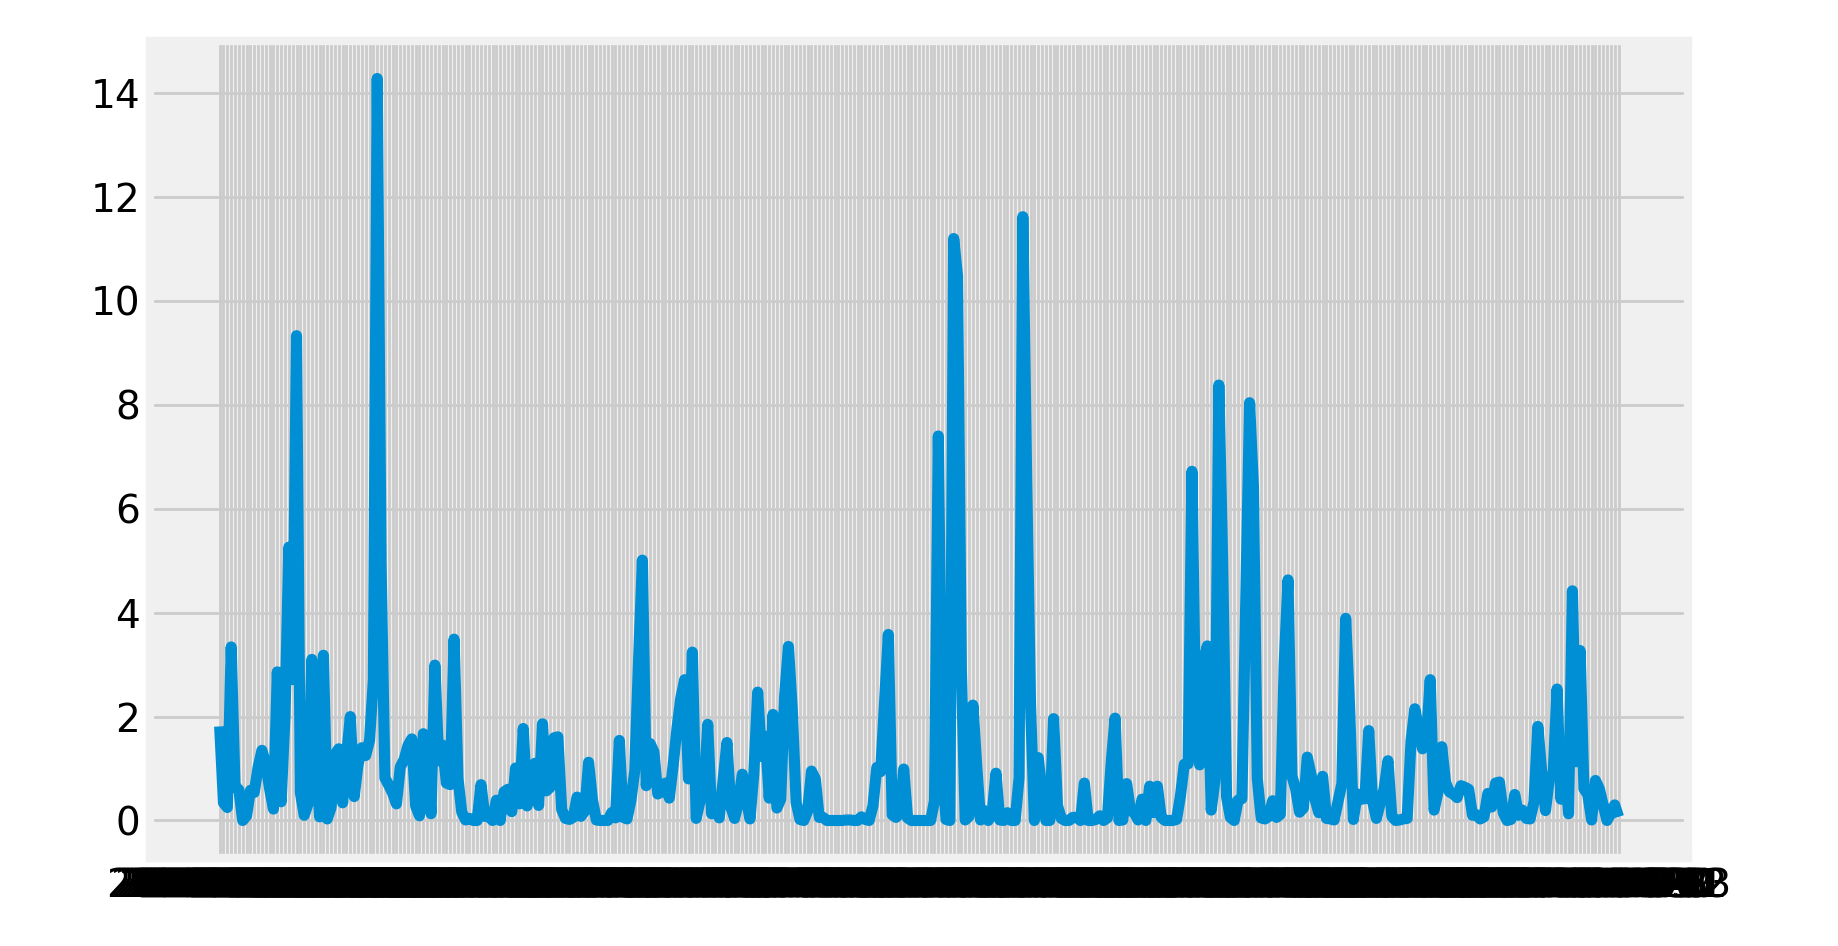

In [76]:
plt.plot(df_m['date'], df_m['Prcp'],label='precipitation')
plt.tight_layout()
plt.show()

In [79]:

  
# Calculate the date 1 year ago from today
#print(dt.date.today())
# date 1 year ago from today
year_ago = dt.date.today() - dt.timedelta(days=365)
year_ago


# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


datetime.date(2017, 8, 4)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data


,precipitation
count,412.000000
mean,0.117549
std,0.294210
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [12]:
# How many stations are available in this dataset?


[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


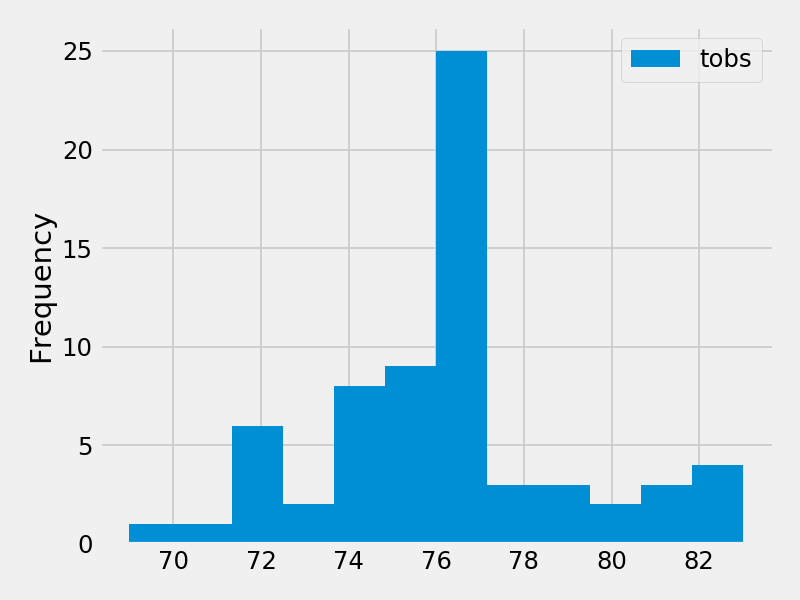

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


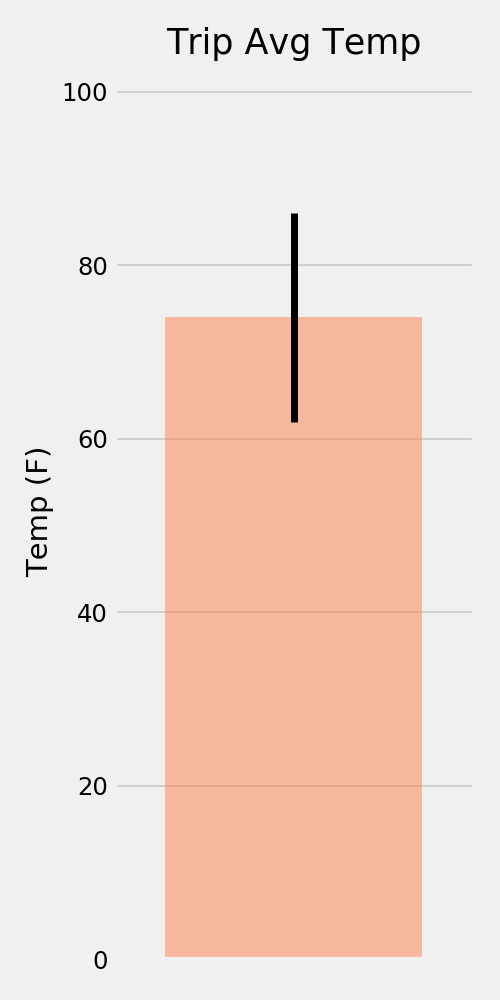

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


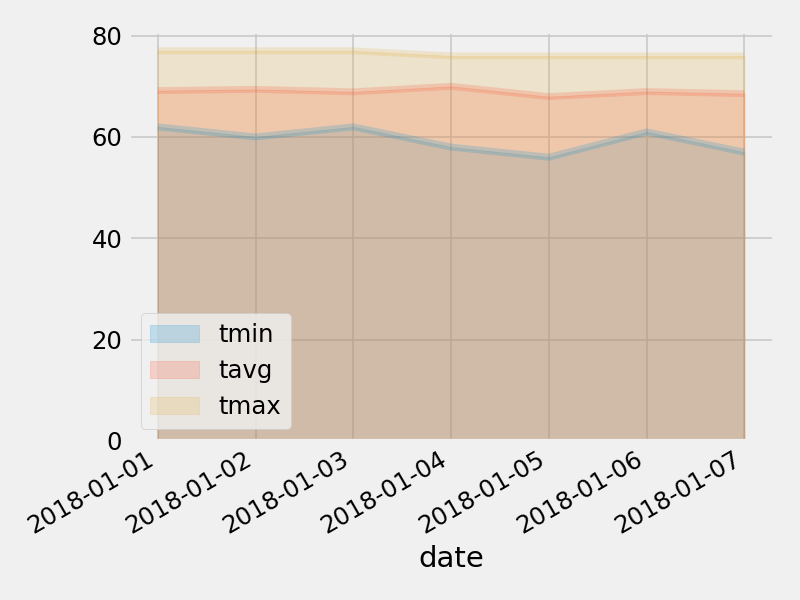

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
